In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import matplotlib
import itertools
from scipy.stats import kstest
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import mixture

In [3]:
df = pd.read_csv("politicians_tweet_data.csv", index_col = 0)

0       0.0
1    1489.0
2       0.0
3       0.0
4       0.0
5       0.0
6    1464.0
7       0.0
8       6.0
9       0.0
Name: favourites, dtype: float64
0    0.000000
1    7.306531
2    0.000000
3    0.000000
4    0.000000
5    0.000000
6    7.289611
7    0.000000
8    1.945910
9    0.000000
Name: favourites, dtype: float64
[-2.  0.  2.  4.  6.  8. 10. 12.]
-2.0412221198356765e-09 1.4083801202886193


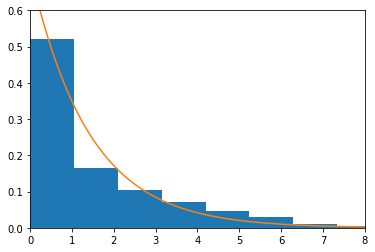

10453


In [4]:
from scipy.stats import expon
favor = df['favourites']
print(favor.head(10))

favor_tnsf = np.log(favor +1)
print(favor_tnsf.head(10))
h = plt.hist(favor_tnsf, normed=True,bins=10)
#1-2 bin size is significantly less than the distribution
xt = plt.xticks()[0]  
print(xt)
xmin, xmax = 0, max(xt)  
lnspc = np.linspace(xmin, xmax, len(favor_tnsf))
loc,scale = expon.fit(favor_tnsf)  
print (loc, scale)
pdf_g = expon.pdf(lnspc, loc, scale)  
plt.plot(lnspc, pdf_g) # plot it
plt.ylim(0,0.6)
plt.xlim(0,8)
plt.show()
print(len(favor_tnsf))

In [136]:
def expon_cdf(x):   
    return expon.cdf(x, loc=-2.0412221198356765e-09, scale=1.4083801202886193)
print(kstest(favor_tnsf, expon_cdf))
#rejected...

KstestResult(statistic=0.4660862895675926, pvalue=0.0)


In [258]:
data = np.array(favor).reshape([-1,1])
bic = []
lowest_bic = np.infty
n_components_range = range(1, 5)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(data)
        bic.append(gmm.bic(data))
        
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)



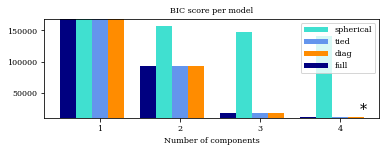

In [259]:
# Plot the BIC scores
#code borrow from :http://www.astroml.org/book_figures/chapter4/fig_GMM_1D.html
spl = plt.subplot(2, 1, 1)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)

In [260]:
print(lowest_bic)
clf = best_gmm
for mean, var in zip(clf.means_, clf.covariances_):
    print ("mean %f, var %f"  %(mean, var))


11098.16222118516
mean 0.000000, var 0.000001
mean 1876.623845, var 16332520.539974
mean 85.142766, var 7069.762091
mean 5.344901, var 22.044047


(0, 50)

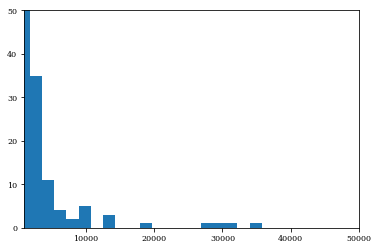

In [268]:
plt.hist(data,histtype='stepfilled',bins = 20 )
plt.xlim(1000,50000)
plt.ylim(0,50)
# 

[0 4 6 ... 1 1 1]
[  1.          54.59815003 403.42879349 ...   2.71828183   2.71828183
   2.71828183]


(0, 50000)

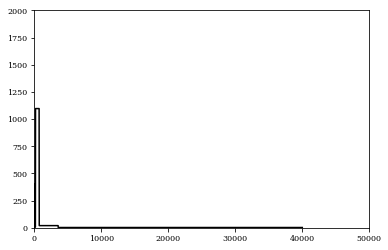

In [249]:
x = np.linspace(0, 40000, len(data)).reshape([-1,1])
logprob = clf.predict(x)
print(logprob)
print(np.exp(logprob))
plt.plot(x, np.exp(logprob), '-k')
plt.ylim(0,2000)
plt.xlim(0,50000)
